# Netflix Dataset Exploratory Data Analysis
#### <span style="color: cornflowerblue">Team 01 | CSPB 4502 | 11/03/22</span>

---

In [1]:
# LIBRARIES USED
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from io import StringIO
import seaborn as sns

In [7]:
# IMPORT NETFLIX MOVIE NAMES
netflix_movie_titles = "../data/netflix/movie_titles.csv"

def manual_sep(old_split):
    new_split = old_split[0:2] + [",".join(old_split[2:])]
    return new_split
    
ntfx = pd.read_csv(netflix_movie_titles,
                   encoding = "ISO-8859-1",
                   header = None,
                   names = ['Movie_Id', 'Year', 'Name'],
                   on_bad_lines=manual_sep,
                   engine='python')
ntfx.dropna(subset='Year', inplace=True)
ntfx['Year'] = ntfx['Year'].astype("Int64")
print("Netflix Movie Names:")
print(f'{ntfx.shape = }')
print(ntfx.head().to_string())
print("Netflix Movie Ratings:")


Netflix Movie Names:
ntfx.shape = (17763, 3)
   Movie_Id  Year                          Name
0         1  2003               Dinosaur Planet
1         2  2004    Isle of Man TT 2004 Review
2         3  1997                     Character
3         4  1994  Paula Abdul's Get Up & Dance
4         5  2004      The Rise and Fall of ECW


In [2]:
# IMPORT NETFLIX MOVIE RATINGS
netflix_movie_ratings = [f'../data/netflix/combined_data_{i}.txt' for i in range(1, 5)]
stream = StringIO()
movie_number = "1"
for path in netflix_movie_ratings:
    print(f'reading file {path}')
    with open(path, "r") as file:
        patrn = "[0-9]:"
        for line in file:
            if re.search(patrn, line):
                movie_num = line.replace(":\n", "")
            else:
                stream.write(movie_num+","+line)
    file.close()  
stream.seek(0)
print("reading done")
ratings = pd.read_csv(stream,
                      encoding = "ISO-8859-1",
                      names = ['Movie_Id', 'CustomerID', 'Rating', 'Date'],
                      engine='c')
stream.close()
del(stream)
print(f'{ratings.shape = }')
print(ratings.head().to_string())

reading file ../data/netflix/combined_data_1.txt
reading file ../data/netflix/combined_data_2.txt
reading file ../data/netflix/combined_data_3.txt
reading file ../data/netflix/combined_data_4.txt
reading done
ratings.shape = (100480507, 4)
   Movie_Id  CustomerID  Rating        Date
0         1     1488844       3  2005-09-06
1         1      822109       5  2005-05-13
2         1      885013       4  2005-10-19
3         1       30878       4  2005-12-26
4         1      823519       3  2004-05-03


In [3]:
len(ratings['CustomerID'].unique())

480189

In [4]:
len(ratings['Movie_Id'].unique())

17770

In [5]:
rating_cnt = ratings.groupby(by=["Movie_Id"])["Rating"].count()
rating_avg = ratings.groupby(by=["Movie_Id"])["Rating"].mean()
rating_std = ratings.groupby(by=["Movie_Id"])["Rating"].std()

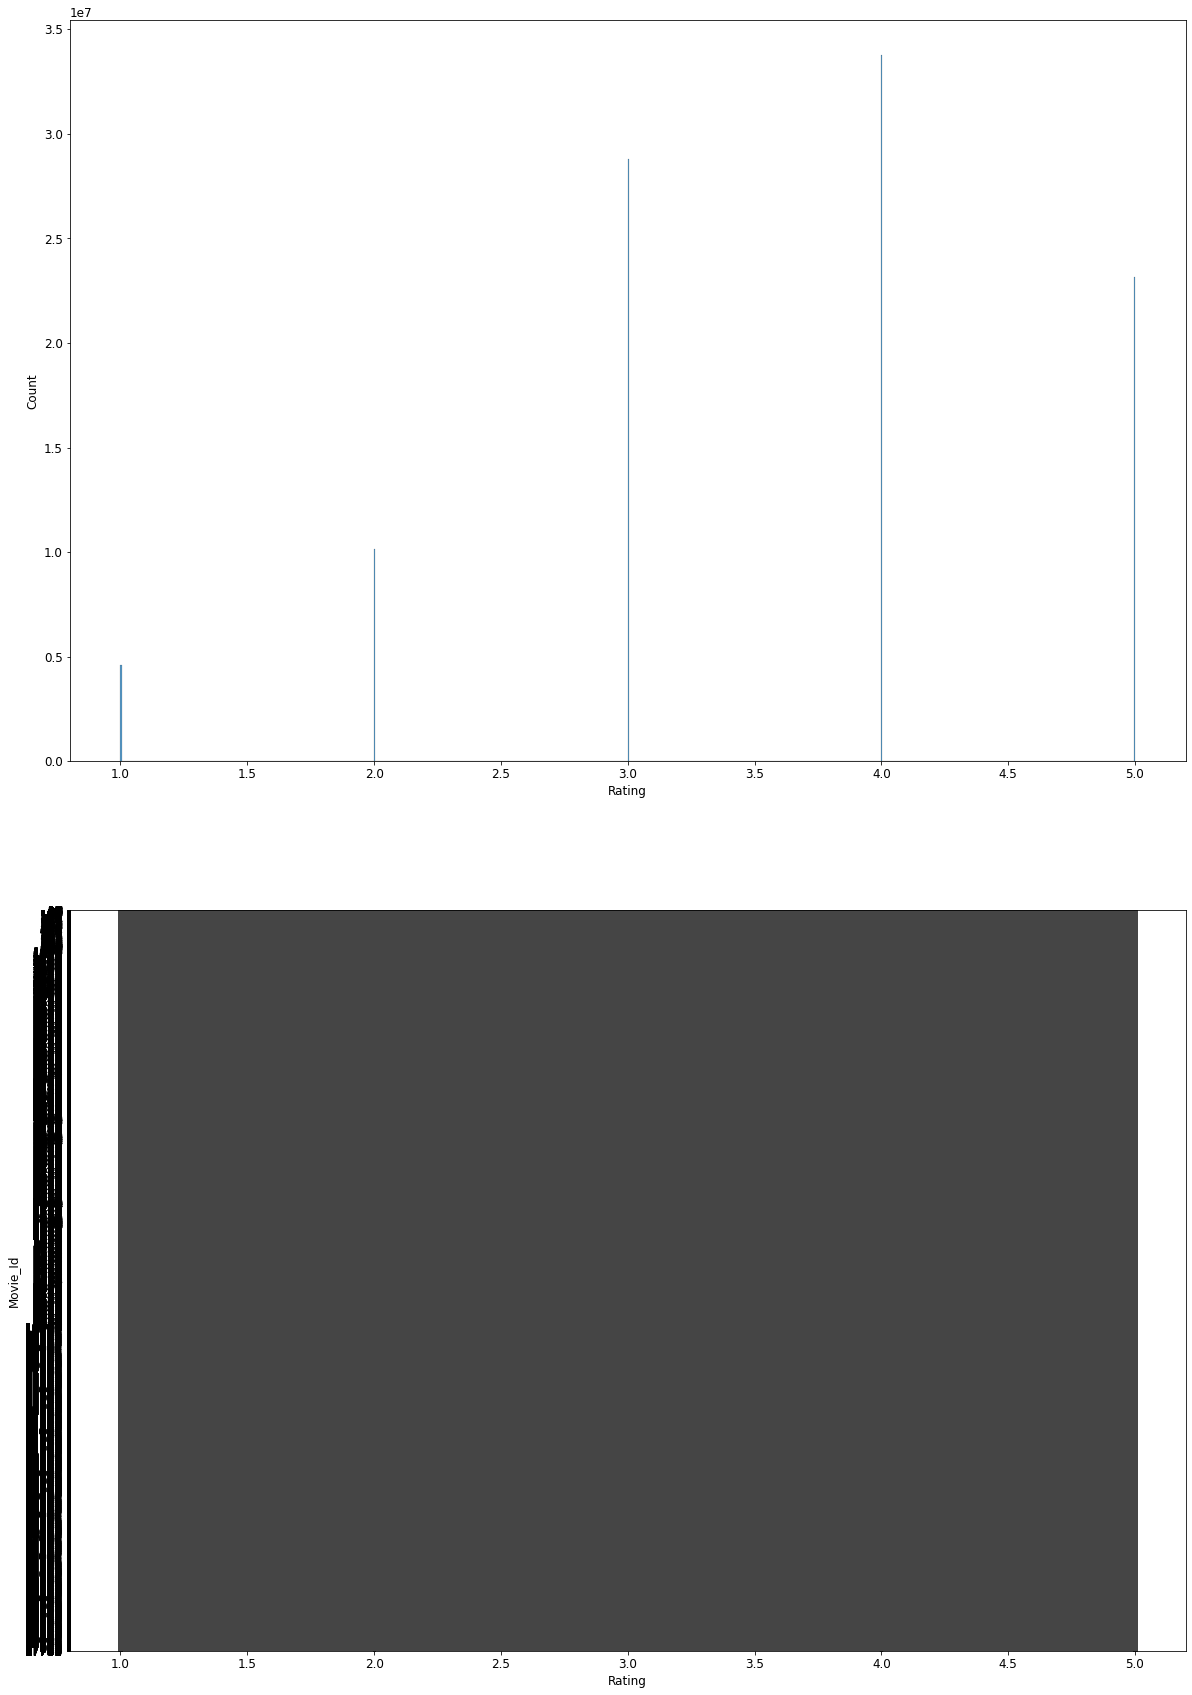

In [10]:
fig = plt.figure(figsize=(20, 30))
font = {'size'   : 12}
plt.rc('font', **font)
ax = fig.add_subplot(2, 1, 1)
sns.histplot(data=ratings, x="Rating")
ax = fig.add_subplot(2, 1, 2)
ax = sns.boxplot(data=ratings, y="Movie_Id", x="Rating", orient="h")
ax.set_axisbelow(True)